A Recommendation System is a filtration program whose prime goal is to predict a user’s “rating” or “preference” toward a domain-specific item or item. In our case, this domain-specific item is a movie. Therefore, the main focus of our recommendation system is to filter and predict only those movies that a user would prefer, given some data about the user.

Types of Recommendation Systems
There are 2 types of recommendation systems- Content-based filtering and Collaborative Filtering.

1.Content-based Filtering
Content-based filtering is a recommendation strategy that suggests items similar to those a user has previously liked. It calculates similarity (often using cosine similarity) between the user’s preferences and item attributes, such as lead actors, directors, and genres. For example, if a user enjoys ‘The Prestige,’ the system recommends movies with Christian Bale, the ‘Thriller’ genre, or films by Christopher Nolan.

However, content-based filtering has drawbacks. It limits exposure to different products, preventing users from exploring a variety of items. This can hinder business expansion as users might not try out new types of products.

2.Collaborative Filtering
Collaborative filtering is a recommendation strategy that considers the user’s behavior and compares it with other users in the database. It uses the history of all users to influence the recommendation algorithm. Unlike a content-based recommender system, a collaborative filtering recommender relies on multiple users’ interactions with items to generate suggestions. It doesn’t solely depend on one user’s data for modeling. There are various approaches to implementing collaborative filtering, but the fundamental concept is the collective influence of multiple users on the recommendation outcome.

There are 2 types of collaborative filtering algorithms:

a.User-based Collaborative filtering
User-based collaborative filtering aims to recommend items to a user (A) based on the preferences of similar users in the database. It involves creating a matrix of items rated/liked/clicked by each user, computing similarity scores between users, and then suggesting items that user A hasn’t encountered yet but similar users have liked.

For example, if user A likes particular movies like Batman Begins, Justice League, and The Avengers and user B like Thor, they share similar interests in the superhero genre. Therefore, it is highly likely that user A would enjoy a popular movie like Thor and user B would like The Avengers, one with the highest movie ratings.

b. Item-based Collaborative Filtering
Item-based Collaborative Filtering focuses on finding similar movies instead of similar users to recommend to user ‘A’ based on their past preferences. It identifies pairs of movies rated/liked by the same users, measures their similarity across all users who rated both, and then suggests similar films based on the similarity scores.

For example, when comparing movies ‘A’ and ‘B,’ we analyze the ratings from users who rated both movies. If these ratings show high similarity, it indicates that ‘A’ and ‘B’ are similar movies. Thus, if someone liked ‘A’, they should be recommended ‘B’, and vice versa.



Movie Recommendation System Code

In this implementation, when the user searches for a movie, we recommend the top 10 similar movies using our movie recommendation system. We will be using an item-based collaborative filtering algorithm for our purpose. The training set used in this demonstration is the movie lens-small dataset.

First, we need to import libraries which we’ll be using in our movie recommendation system with machine Learning. Also, we’ll import the dataset by adding the path of the CSV files. Then we will have a look at the movies dataset :

In [11]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


The movie dataset has the following:

movieId: Once the recommendation is made, we get a list of all similar movieIds
and the title for each movie from this dataset.

Genres: Which are not required for this filtering approach.

In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Ratings dataset has-

userId: Unique for each user.

movieId: We take the movie title from the movie dataset using this feature.

Rating: Each user gives ratings for all the films. Using this, we are going to predict the top 10 similar films.

Here, we can see that userId one has watched movieId 1 and 3 and rated them 4.0 but has not rated movieId two. This interpretation is more challenging to extract from this dataframe. Therefore, to make things easier to understand and work with, we will make a new dataframe where each column represents each unique user, and each row represents each unique movie.

In [13]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


Now, it’s much easier to interpret that userId 1 has rated movieId 1& 3 4.0 but has not rated movieId 3,4,5 at all (therefore, they are represented as NaN ), and therefore, their rating data is missing.

Let’s fix this and impute NaN with 0 to make the algorithm understandable and the data more eye-soothing.

In [14]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


Removing Noise from the Data
In the real world, ratings are very sparse, and data points are mainly collected from Noisetop-rated movies and highly engaged users. We wouldn’t want movies rated by a few users because it’s not credible enough. Similarly, users who have rated only a handful of films should also not be considered.

Considering all that and some trial-and-error experimentation, we will reduce the noise by adding filters to the final dataset.

To qualify for a movie, a minimum of 10 users should hoist a film. The user should have voted for at least 50 movies to qualify users.

Let’s Visualize How These Filters Look Like
Aggregating the number of users who voted and the number of movies who voted.

In [15]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

Let’s visualize the number of users who voted with our threshold of 10.

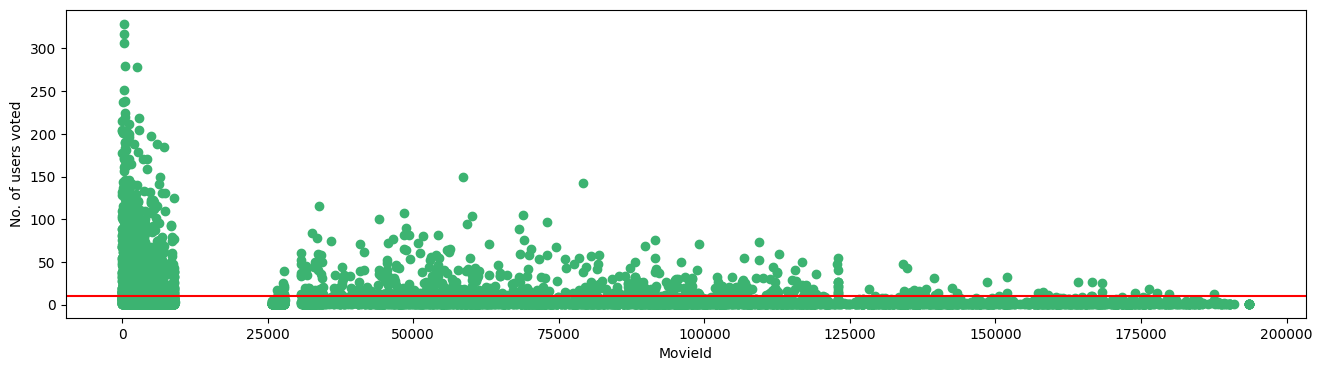

In [16]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [17]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

Let’s visualize the number of votes by each user with our threshold of 50.

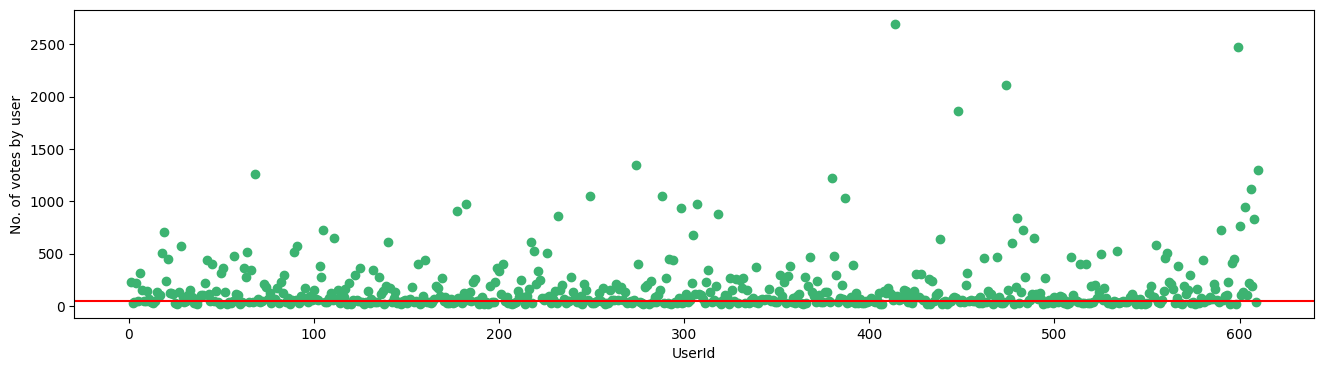

In [18]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [19]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Removing Sparsity
Our final dataset has dimensions of 2121 * 378, and most of the values are sparse. We are using only a small dataset, but for the original large dataset of movie lenses, which has more than 100,000 features, our system may run out of computational resources when fed to the model. We use the csr_matrix function from the scipy library to reduce the sparsity.

 I’ll give an example of how it works :

In [20]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [21]:
csr_sample = csr_matrix(sample)
print(csr_sample)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (3, 5)>
  Coords	Values
  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


As you can see, there is no sparse value in the csr_sample, and values are assigned as rows and column indexes. For the 0th row and 2nd column, the value is 3.

Applying the csr_matrix method to the dataset :

In [22]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

Making the Movie Recommendation System

We will be using the  algorithm to compute similarity with cosine distance metric which is very fast and more preferable than pearson coefficient.

In [23]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

Making the Recommendation Function

The working principle is very simple. We first check if the movie name input is in the database. If it is, we use our recommendation system to find similar movies, sort them based on their similarity distance, and output only the top 10 movies with their distances from the input movie.

In [24]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

Finally, Let’s Recommend Some Movies!

In [25]:
get_movie_recommendation('Iron Man')


,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319


In [26]:
get_movie_recommendation('Memento')

,Title,Distance
1,American Beauty (1999),0.389346
2,American History X (1998),0.388615
3,Pulp Fiction (1994),0.386235
4,"Lord of the Rings: The Return of the King, The...",0.371622
5,Kill Bill: Vol. 1 (2003),0.350167
6,"Lord of the Rings: The Two Towers, The (2002)",0.348358
7,Eternal Sunshine of the Spotless Mind (2004),0.346196
8,"Matrix, The (1999)",0.326215
9,"Lord of the Rings: The Fellowship of the Ring,...",0.316777
10,Fight Club (1999),0.272380


In conclusion,
building a movie recommendation system with machine learning significantly enhances user experience by providing personalized movie suggestions based on individual preferences. Utilizing algorithms such as collaborative filtering and content-based filtering, these systems leverage user behavior data to deliver accurate and relevant recommendations. With the integration of Python and robust datasets like MovieLens, developers can create sophisticated recommendation engines akin to Netflix’s or Amazon Prime’s, using techniques like cosine similarity and matrix factorization. Embracing these technologies enriches user engagement and drives retention and satisfaction, showcasing the transformative power of data science in personalized content delivery.

Key Takeaways:

Content-based filtering recommends items similar to those a user has liked before, while collaborative filtering suggests items based on similarities between users’ behaviors and preferences.
Learn about the challenges such as fickle user preferences, large matrices, and vulnerability to shilling attacks in user-based collaborative filtering and how item-based collaborative filtering can mitigate some of these issues.
Understand the importance of data preparation, including removing noise and handling sparsity, to ensure the recommendation system functions effectively and efficiently.
Gain insights into the practical steps and Python code required to build and test a movie recommendation system, including data importing, matrix manipulation, and model training.
Recognize the real-world impact of recommendation systems, such as those used by Netflix, and how they improve user satisfaction by providing personalized and relevant content suggestions.